In [ ]:
!nvidia-smi

Mon Feb  7 12:52:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/X_Ray_Data1.zip"

Streaming output truncated to the last 5000 lines.
  inflating: X_Ray_Data1/COVID/COVID-166.png  
  inflating: X_Ray_Data1/COVID/COVID-167.png  
  inflating: X_Ray_Data1/COVID/COVID-168.png  
  inflating: X_Ray_Data1/COVID/COVID-169.png  
  inflating: X_Ray_Data1/COVID/COVID-17.png  
  inflating: X_Ray_Data1/COVID/COVID-170.png  
  inflating: X_Ray_Data1/COVID/COVID-171.png  
  inflating: X_Ray_Data1/COVID/COVID-172.png  
  inflating: X_Ray_Data1/COVID/COVID-173.png  
  inflating: X_Ray_Data1/COVID/COVID-174.png  
  inflating: X_Ray_Data1/COVID/COVID-175.png  
  inflating: X_Ray_Data1/COVID/COVID-176.png  
  inflating: X_Ray_Data1/COVID/COVID-177.png  
  inflating: X_Ray_Data1/COVID/COVID-178.png  
  inflating: X_Ray_Data1/COVID/COVID-179.png  
  inflating: X_Ray_Data1/COVID/COVID-18.png  
  inflating: X_Ray_Data1/COVID/COVID-180.png  
  inflating: X_Ray_Data1/COVID/COVID-181.png  
  inflating: X_Ray_Data1/COVID/COVID-182.png  
  inflating: X_Ray_Data1/COVID/COVID-183.png  
  inflating

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing import image as im
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras import models,layers
import os

In [ ]:
main_folder='X_Ray_Data1'
names=os.listdir(main_folder)
names

['Lung_Opacity', 'Normal', 'Viral Pneumonia', 'COVID']

In [ ]:
x=[] # to store images
y=[] # to store images


In [ ]:
for folder in names:
  files_names=os.listdir(main_folder+"/"+folder)
  for img_name in files_names:
    path=main_folder+"/"+folder+"/"+img_name
    img=im.load_img(path,target_size=(250,250))
    img=im.img_to_array(img)
    x.append(img)
    y.append(names.index(folder))

In [ ]:
x

[array([[[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 5.,  5.,  5.],
         [ 4.,  4.,  4.],
         [ 5.,  5.,  5.]],
 
        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 8.,  8.,  8.],
         [ 7.,  7.,  7.],
         [ 8.,  8.,  8.]],
 
        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 9.,  9.,  9.],
         [10., 10., 10.],
         [10., 10., 10.]],
 
        ...,
 
        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 5.,  5.,  5.],
         [ 6.,  6.,  6.],
         [ 8.,  8.,  8.]],
 
        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 5.,  5.,  5.],
         [ 6.,  6.,  6.],
         [ 8.,  8.,  8.]],
 
        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 4.,  4.,  4.],
  

In [ ]:
x=np.array(x)
y=np.array(y)

In [ ]:
y=to_categorical(y)
print(x.shape)
print(y.shape)

In [ ]:
layer1=layers.Input(shape=(250,250,3))
layer2=layers.Conv2D(filters=8,kernel_size=(3,3),activation='relu')(layer1)
layer3=layers.MaxPooling2D(pool_size=(2,2))(layer2)
layer4=layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu')(layer3)
layer4=layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu')(layer4)
layer5=layers.MaxPooling2D(pool_size=(2,2))(layer4)
layerk=layers.Dropout(0.2)(layer5)
layer6=layers.Flatten()(layerk)
layer7=layers.Dense(200,activation='relu')(layer6)
layer8=layers.Dense(4,activation='softmax')(layer7)
model=models.Model(inputs=layer1,outputs=layer8)





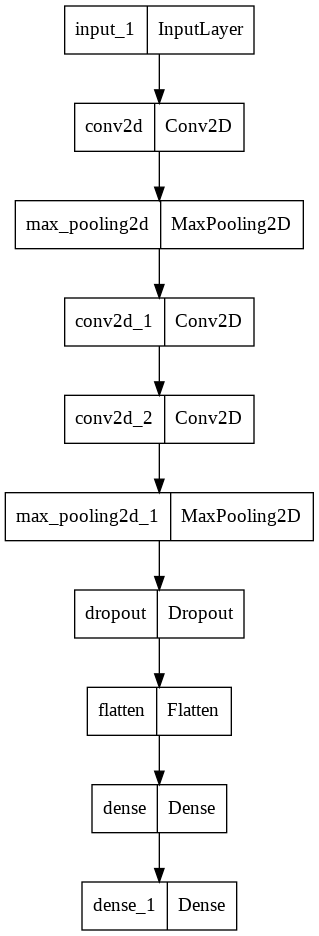

In [ ]:
plot_model(model)